## Case Study on Regression

### Loading the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\assignment_saurav/car_age_price.csv')
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


### Analyzing the dataset

In [3]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [4]:
df.isnull().sum()

Year     0
Price    0
dtype: int64

There are no null values

#### Data visualization

In [5]:
import seaborn as sns

In [6]:
price = df['Price']
year = df['Year']

<Axes: xlabel='Year', ylabel='Price'>

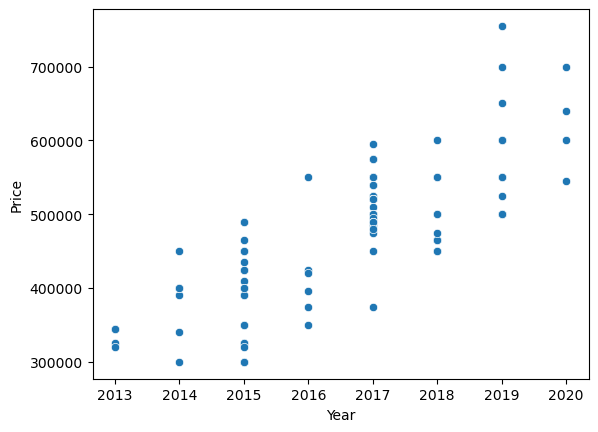

In [7]:
sns.scatterplot(x=year, y=price)

From this plot we conclude that there is a correlation between 'Price' and 'Year'

### Splitting data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = df['Year']
y = df['Price']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 24)

In [11]:
x_train.shape

(89,)

In [12]:
x_train = np.array(x_train).reshape(-1,1)
x_train.shape

(89, 1)

In [13]:
x_test = np.array(x_test).reshape(-1,1)
x_test.shape

(23, 1)

### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
accuracy_lr = lr.score(x_test, y_test)
print(accuracy_lr)

0.7561200001046987


### Train & Evaluate Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dr_model = DecisionTreeRegressor()

In [20]:
dr_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [21]:
accuracy_dr = dr_model.score(x_test, y_test)
accuracy_dr

0.8206021915423627

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf_model = RandomForestRegressor(n_estimators= 100, max_depth=25) #Instantiate an object

In [24]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=25)

In [25]:
accuracy_rf = rf_model.score(x_test, y_test)
accuracy_rf

0.8250379536400169

__Linear Regression: 75.61 %__  
__Decision Tree: 82.06 %__  
__Random Forest: 81.75 %__

__Therefore the decision tree method is the most accurate method.__

### Predicting the possible price of a 2022 model second-hand grand i10

In [26]:
predicted_price_2022 =dr_model.predict([[2022]])

In [27]:
predicted_price_2022=float(predicted_price_2022)

In [28]:
print("The predicted price for a 2022 model second-hand Grand i10 is ₹",predicted_price_2022)

The predicted price for a 2022 model second-hand Grand i10 is ₹ 595000.0


### Lasso Regression

- LASSO regression, also known as L1 regularization, is a  technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. 
- LASSO stands for Least Absolute Shrinkage and Selection Operator.  
- Lasso is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights.

In [29]:
from sklearn.linear_model import Lasso

In [30]:
lasso_model = Lasso(alpha=0.1)

In [31]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.1)

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(x_train, y_train)

LinearRegression()

In [34]:
accuracy_lasso = lasso_model.score(x_test, y_test)
accuracy_lasso

0.756119839593641

In [35]:
accuracy_linear = lr.score(x_test, y_test)
accuracy_linear

0.7561200001046987

__Linear Regression: 0.756119839593641__  
__Lasso Regression: 0.7561200001046987__  

In [36]:
if accuracy_linear > accuracy_lasso:
    print("Linear Regression performs better.")
elif accuracy_linear < accuracy_lasso:
    print("Lasso Regression performs better.")
else:
    print("Both models perform equally.")

Linear Regression performs better.


__From this it is clear that linear regression performs slightly better than lasso regression for my model.__